In [1]:
# download dataset_L25_train_random.csv
!gdown '1vXn30idOKST5vdfcW7AHHcGO0f2Piu_U'

# download dataset_L25_test_random.csv
!gdown '13utdPI11VYjSpYOX5vIBJ4TH_1vF7hDP'

# download dataset_L25_train.csv (semantic split)
!gdown '1-X3DZZu_GMd22T2jnvwiA39hPiaaHwgx'

#download dataset_L25_test.csv (semantic split)
!gdown '1fVV2iObSLesVRnqfbrFbgCTR-_eESSJa'

Downloading...
From: https://drive.google.com/uc?id=1vXn30idOKST5vdfcW7AHHcGO0f2Piu_U
To: /content/dataset_L25_train_random.csv
100% 11.8M/11.8M [00:00<00:00, 42.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=13utdPI11VYjSpYOX5vIBJ4TH_1vF7hDP
To: /content/dataset_L25_test_random.csv
100% 11.8M/11.8M [00:00<00:00, 45.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-X3DZZu_GMd22T2jnvwiA39hPiaaHwgx
To: /content/dataset_L25_train.csv
100% 6.44M/6.44M [00:00<00:00, 47.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fVV2iObSLesVRnqfbrFbgCTR-_eESSJa
To: /content/dataset_L25_test.csv
100% 6.86M/6.86M [00:00<00:00, 66.7MB/s]


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.0 MB/s eta 0:00:00


In [3]:
from tokenizers import normalizers, pre_tokenizers
import pandas as pd
import numpy as np
import re

In [4]:
class PunctuationPreTokenizer:
    def __init__ (self):
        self.normalizer = normalizers.BertNormalizer(lowercase=True, strip_accents=False,)
        self.pre_tok = pre_tokenizers.BertPreTokenizer()
    def encode (self, w):
        w = self.normalizer.normalize_str(w)
        l = self.pre_tok.pre_tokenize_str(w)
        res = [t for t, pos in l]
        return res

In [5]:
file_muscle_random_train = '/content/dataset_L25_train_random.csv'
file_muscle_random_test = '/content/dataset_L25_test_random.csv'
file_muscle_sem_train = '/content/dataset_L25_train.csv'
file_muscle_sem_test = '/content/dataset_L25_test.csv'

muscle_r_train = pd.read_csv(file_muscle_random_train)
muscle_r_test = pd.read_csv(file_muscle_random_test)
muscle_s_train = pd.read_csv(file_muscle_sem_train)
muscle_s_test = pd.read_csv(file_muscle_sem_test)

**Stats of the MUSCLE dataset (random and semantic splits)**

In [26]:
count_r_train = muscle_r_train['relation_type'].value_counts().sort_index()
count_r_test = muscle_r_test['relation_type'].value_counts().sort_index()
count_s_train = muscle_s_train['relation_type'].value_counts().sort_index()
count_s_test = muscle_r_test['relation_type'].value_counts().sort_index()


In [6]:
subj_concepts_muscle_r_train = muscle_r_train['subject'].unique()
obj_concepts_muscle_r_train = muscle_r_train['object'].unique()
concepts_muscle_r_train = np.unique(np.concatenate([subj_concepts_muscle_r_train,obj_concepts_muscle_r_train]))

subj_concepts_muscle_r_test = muscle_r_test['subject'].unique()
obj_concepts_muscle_r_test = muscle_r_test['object'].unique()
concepts_muscle_r_test = np.unique(np.concatenate([subj_concepts_muscle_r_test,obj_concepts_muscle_r_test]))

concepts_muscle_r_inter_train_test = set(concepts_muscle_r_train).intersection(set(concepts_muscle_r_test))

subj_concepts_muscle_s_train = muscle_s_train['subject'].unique()
obj_concepts_muscle_s_train = muscle_s_train['object'].unique()
concepts_muscle_s_train = np.unique(np.concatenate([subj_concepts_muscle_s_train,obj_concepts_muscle_s_train]))

subj_concepts_muscle_s_test = muscle_s_test['subject'].unique()
obj_concepts_muscle_s_test = muscle_s_test['object'].unique()
concepts_muscle_s_test = np.unique(np.concatenate([subj_concepts_muscle_s_test,obj_concepts_muscle_s_test]))

concepts_muscle_s_inter_train_test = set(concepts_muscle_s_train).intersection(set(concepts_muscle_s_test))

print(len(concepts_muscle_r_train))
print(len(concepts_muscle_r_test))
print(len(concepts_muscle_s_train))
print(len(concepts_muscle_s_test))

print(len(concepts_muscle_r_inter_train_test))
print(len(concepts_muscle_s_inter_train_test))

6459
6464
3399
3414
5692
0


In [47]:
rans_list = ['/'.join([str(len(concepts_muscle_r_train)),str(len(concepts_muscle_r_test))])]
rans_list.append(str(len(set(concepts_muscle_r_train).union(concepts_muscle_r_test))))

for i in count_r_train.index:
    rans_list.append('/'.join([str(count_r_train[i]),str(count_r_test[i])]))

rans_list.append('/'.join([str(muscle_r_train.shape[0]),str(muscle_r_test.shape[0])]))

sems_list = ['/'.join([str(len(concepts_muscle_s_train)),str(len(concepts_muscle_s_test))])]
sems_list.append(str(len(set(concepts_muscle_s_train).union(concepts_muscle_s_test))))

for i in count_s_train.index:
    sems_list.append('/'.join([str(count_s_train[i]),str(count_s_test[i])]))

sems_list.append('/'.join([str(muscle_s_train.shape[0]),str(muscle_s_test.shape[0])]))

dict_stats_muscle = {'RanS train/test':rans_list, 'SemS train/test':sems_list}
df_stats_muscle = pd.DataFrame.from_dict(dict_stats_muscle)

df_stats_muscle.index = ['Concepts', 'Total concepts', 'ant', 'holo', 'hyper', 'hypo', 'mero', 'random', 'Total']
df_stats_muscle

,RanS train/test,SemS train/test
Concepts,6459/6464,3399/3414
Total concepts,7231,6813
ant,148/148,145/148
holo,841/842,470/842
hyper,1332/1332,955/1332
hypo,1332/1332,993/1332
mero,473/472,340/472
random,9627/9628,4713/9628
Total,13753/13754,7616/7841


**Muliword stats**

In [7]:
def concepts_verb(data_set, dict_verbs):
    for c, verbs in data_set.iterrows():
        csub = verbs['subject']
        cobj = verbs['object']
        if csub not in dict_verbs:
            indxs = [ lab for lab in verbs.index if '_subject' in lab]
            new_indxs = [re.sub('_.*','',lab) for lab in indxs]
            dict_verbs[csub] = verbs[indxs]
            dict_verbs[csub].index = new_indxs
        if cobj not in dict_verbs:
            indxs = [ lab for lab in verbs.index if '_object' in lab]
            new_indxs = [re.sub('_.*','',lab) for lab in indxs]
            dict_verbs[cobj] = verbs[indxs]
            dict_verbs[cobj].index = new_indxs

verb_concepts_muscle_r={}
concepts_verb(muscle_r_train, verb_concepts_muscle_r)
concepts_verb(muscle_r_test, verb_concepts_muscle_r)

verb_concepts_muscle_s={}
concepts_verb(muscle_s_train, verb_concepts_muscle_s)
concepts_verb(muscle_s_test, verb_concepts_muscle_s)

In [8]:
df_muscle_r = pd.DataFrame.from_dict(verb_concepts_muscle_r).sort_index()
df_muscle_r = df_muscle_r.T

df_muscle_s = pd.DataFrame.from_dict(verb_concepts_muscle_s).sort_index()
df_muscle_s = df_muscle_s.T

tokenizer = PunctuationPreTokenizer()

multi_words_muscle_r = df_muscle_r.apply(lambda x : [len(tokenizer.encode(a)) for a in x], axis=0)
stats_multi_words_muscle_r = multi_words_muscle_r.apply(lambda x: [sum(x==1)/len(x),1 -sum(x==1)/len(x)], axis=0)

multi_words_muscle_s = df_muscle_s.apply(lambda x : [len(tokenizer.encode(a)) for a in x], axis=0)
stats_multi_words_muscle_s = multi_words_muscle_s.apply(lambda x: [sum(x==1)/len(x),1 -sum(x==1)/len(x)], axis=0)

In [9]:
import matplotlib.pyplot as plt

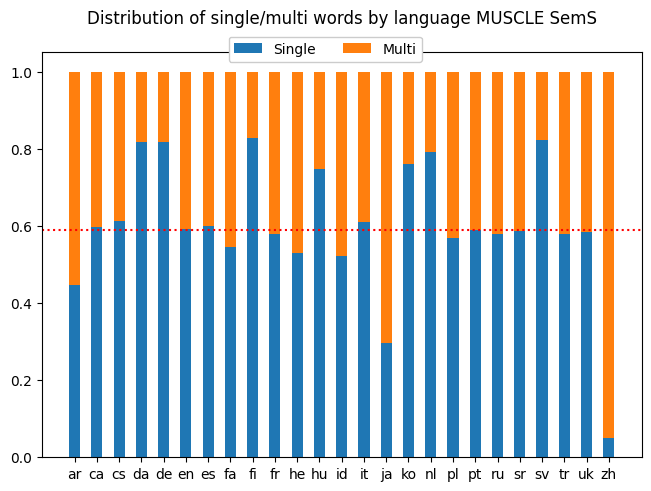

In [10]:
languages = stats_multi_words_muscle_s.columns

weight_counts_s = {
    "Single": stats_multi_words_muscle_s.iloc[0],
    "Multi": stats_multi_words_muscle_s.iloc[1],
}

weight_counts_r = {
    "SingleRanS": stats_multi_words_muscle_r.iloc[0],
    "MultiRanS": stats_multi_words_muscle_r.iloc[1],
}

median_s = np.median(stats_multi_words_muscle_s.iloc[0])

fig, ax = plt.subplots(layout='constrained')
# bottom_r = np.zeros(25)
width = 0.5
bottom_s = np.zeros(25)

for (type_word_r, weight_count_r), (type_word_s, weight_count_s) in zip(weight_counts_r.items(), weight_counts_s.items()):
    p = ax.bar(languages, weight_count_s, width, label=type_word_s, bottom=bottom_s)
    bottom_s += weight_count_s


ax.set_title("Distribution of single/multi words by language MUSCLE SemS\n")
legend  = ax.legend(bbox_to_anchor=(0.3, 0.96), ncol=2)
legend.get_frame().set_alpha(None)

# plot median
plt.axhline(y = median_s, color = 'r', linestyle = ':')

plt.savefig('multiwords.png', bbox_inches='tight')
plt.show()



**Participation label stats**

In [11]:
labels = muscle_r_train['relation_type'].unique()

label_dist_muscle_r = {k:pd.Series(np.zeros(6),index=labels) for k in set(concepts_muscle_r_train).union(concepts_muscle_r_test)}
for i, r in muscle_r_train.iterrows():
    label_dist_muscle_r[r['subject']][r['relation_type']] += 1
    label_dist_muscle_r[r['object']][r['relation_type']] += 1

for i, r in muscle_r_test.iterrows():
    label_dist_muscle_r[r['subject']][r['relation_type']] += 1
    label_dist_muscle_r[r['object']][r['relation_type']] += 1

label_dist_muscle_s = {k:pd.Series(np.zeros(6),index=labels) for k in set(concepts_muscle_s_train).union(concepts_muscle_s_test)}
for i, r in muscle_s_train.iterrows():
    label_dist_muscle_s[r['subject']][r['relation_type']] += 1
    label_dist_muscle_s[r['object']][r['relation_type']] += 1

for i, r in muscle_s_test.iterrows():
    label_dist_muscle_s[r['subject']][r['relation_type']] += 1
    label_dist_muscle_s[r['object']][r['relation_type']] += 1



In [12]:
df_label_dist_muscle_r = pd.DataFrame.from_dict(label_dist_muscle_r)
df_label_dist_muscle_s = pd.DataFrame.from_dict(label_dist_muscle_s)

d_r = df_label_dist_muscle_r.apply(lambda x: np.argwhere(np.array(x)).shape[0])
d_s = df_label_dist_muscle_s.apply(lambda x: np.argwhere(np.array(x)).shape[0])

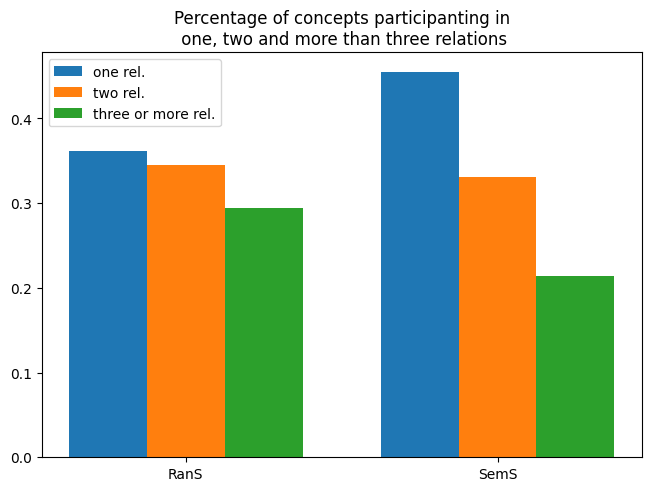

In [13]:
splits = ['RanS', 'SemS']

dist_dict={
    'one rel.':[sum(d_r==1)/len(d_r), sum(d_s==1)/len(d_s)],
    'two rel.':[sum(d_r==2)/len(d_r), sum(d_s==2)/len(d_s)],
    'three or more rel.':[sum(d_r>=3)/len(d_r), sum(d_s>=3)/len(d_s)],
}

x = np.arange(len(splits))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dist_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Percentage of concepts participanting in\n one, two and more than three relations')
ax.set_xticks(x + width, splits)
ax.legend(loc='upper left', ncols=1)

plt.savefig('distlabels.png', bbox_inches='tight')
plt.show()